## 오차제곱합 (가장 많이 씀)

In [3]:
import numpy as np

In [4]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [5]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [7]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

## 교차 엔트로피 오차 (많이 씀)

In [8]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

t = [0,0,1,0,0,0,0,0,0,0] # 숫자 ==>  2

In [9]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [10]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0] # 6에 확률 값을 높임
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [13]:
y = [0.1,0.05,0.3,0.4,0.05,0.1,0.0,0.0,0.0,0.0] # 3에 확률 값을 높임
cross_entropy_error(np.array(y), np.array(t))

1.2039724709926583

## 미니배치 학습
#### ( train set 중 일부를 무작위로 꺼내(미니배치) 경사법으러 매개변수를 갱신)

In [1]:
import sys, os
sys.path.append('./deep-learning-from-scratch-master')
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []

#하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    # 미니배치
    batch = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch]
    t_batch = t_train[batch]
    
    #기울기 계산 (경사하강법)
    grad = network.numerical_gradient(x_betch, t_batch)
    
    #매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

NameError: name 'TwoLayerNet' is not defined

## 미니배치 교차 엔트로피

In [41]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    retrun -np.sum(t * np.log(y + 1e-7)) / batch_size

cross_entropy_error(y, t)

AttributeError: 'list' object has no attribute 'ndim'

## 수치 미분

In [42]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

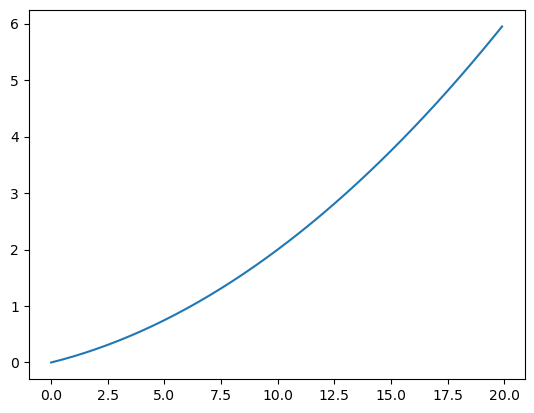

In [43]:
import matplotlib.pyplot as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x,y)
plt.show()

In [45]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


## 편미분

In [52]:
def function_2(x):
    return x[0]**2 + x[1]**2

## 기울기

In [60]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [61]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [63]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

## 경사하강법

In [64]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x

In [70]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

## 신경망 기울기

In [87]:
import sys, os
sys.path.append('./deep-learning-from-scratch-master/ch04/gradient_simplenet.py')
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    
net = simpleNet()
print(net.W)

[[ 1.57187143 -1.94568346  0.21233895]
 [-1.01766089  0.31715299  0.17074824]]


In [88]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[ 0.02722806 -0.88197239  0.28107679]


In [89]:
np.argmax(p)

2

In [90]:

t = np.array([0,0,1])
net.loss(x, t)

0.73636971884521

In [92]:
def f(W):
    return net.loss(x,t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.22289722  0.0897933  -0.31269052]
 [ 0.33434584  0.13468995 -0.46903578]]


In [93]:
np.random.randn(2,3)

array([[-1.9728149 ,  0.38810386,  0.56015874],
       [ 0.47232118,  0.95441738,  1.14696939]])

## #########################

In [96]:
softmax_output = [0.8,0.1,0.1]
target_label = [1,0,0]

result = -(1 * np.log(0.8) + 0 * np.log(0.1) + 0 * np.log(0.1))
print(result)

def cross_entropy_error(y, t):
    return -np.sum(t * np.log(y))
result_2 = cross_entropy_error(softmax_output, target_label)
print(result_2)

0.2231435513142097
0.2231435513142097


In [99]:
softmax_outputs = np.array([
    [0.7,0.1,0.2],
    [0.1,0.5,0.4],
    [0.02,0.9,0.08]
])
class_target = [0,1,1]

for target_index, value in zip(class_target, softmax_outputs):
    print(value[target_index])


0.7
0.5
0.9


In [109]:
softmax_outputs[[0,1,2],class_target] 
# 각각의 행에서 class_target 값이 가리키는 인덱스 값 구함


array([0.7, 0.5, 0.9])

In [107]:


-np.log(softmax_outputs[range(len(softmax_outputs)), class_target])

array([0.35667494, 0.69314718, 0.10536052])

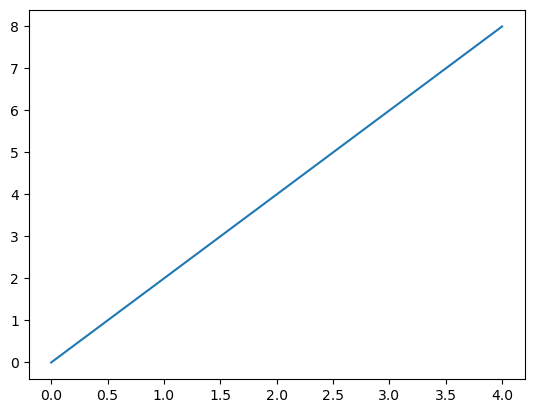

1

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x

x = np.array(range(5))
y = f(x)
plt.plot(x,y)
plt.show()

(y[1]-y[0]) - (x[1]-x[0]) # ==> 기울기


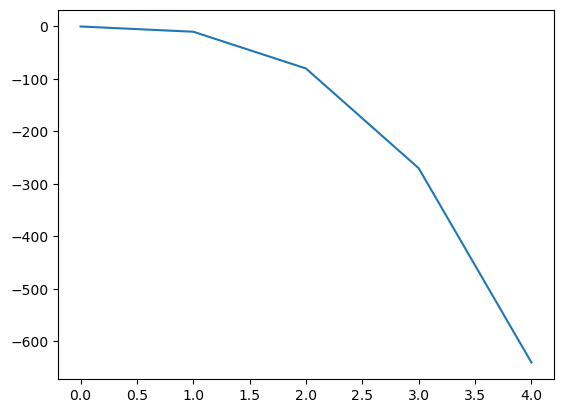

In [130]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return -10*x**3

x = np.array(range(5))
y2 = f1(x)
plt.plot(x,y2)
plt.show()

# (y[1]-y[0]) - (x[1]-x[0]) # ==> 기울기


## 최종 학습 알고리즘

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numericaㄴㅁl_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # 개정판 numerical_gradient => gradient
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward (신경망을 앞에서부터)
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        
        # backward (신경망을 뒤에서부터)
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

train acc:  0.10441666666666667
test acc:  0.1028
train acc:  0.7999833333333334
test acc:  0.803
train acc:  0.87965
test acc:  0.8821
train acc:  0.8985333333333333
test acc:  0.9016
train acc:  0.9077333333333333
test acc:  0.9107
train acc:  0.91435
test acc:  0.9154
train acc:  0.9205333333333333
test acc:  0.9204
train acc:  0.92405
test acc:  0.9238
train acc:  0.92805
test acc:  0.9285
train acc:  0.93085
test acc:  0.93
train acc:  0.9338333333333333
test acc:  0.9334
train acc:  0.9362666666666667
test acc:  0.9353
train acc:  0.9392666666666667
test acc:  0.9395
train acc:  0.9413833333333333
test acc:  0.9407
train acc:  0.9436666666666667
test acc:  0.9423
train acc:  0.94495
test acc:  0.9427
train acc:  0.9474
test acc:  0.9448


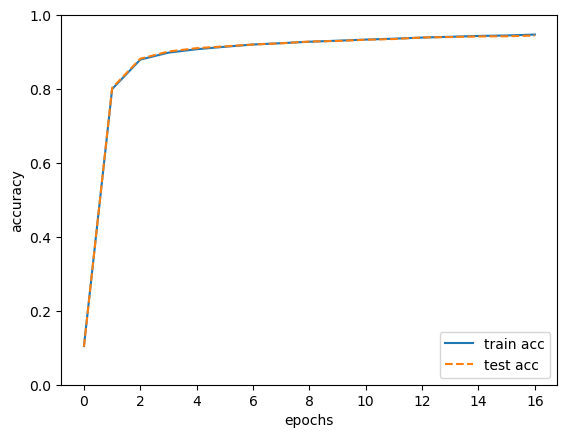

In [20]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0] #전체 사이즈 ==> 60,000개. epoch
batch_size = 100   # 미니배치 크기 (100개씩 나눠서 처리)
learning_rate = 0.1 # 0.1 씩 내려가는 경사하강법

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
#     print(i, batch_mask.shape)
    
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc: ", str(train_acc))
        print("test acc: ", str(test_acc))
        print('===============================')

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [ ]:
## 시험 데이터로 평가하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
(x_train, t_train), (x_test, t_test) = load_mnist(normslize = True, one_hot_encoding = True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

iters_num = 10000
train_size = x_train.shape[0]
bat